# Walking through convolutions


In [14]:
#import paskages
from scipy import misc
import numpy as np
from matplotlib import pyplot as plt

In [9]:
#Load ascent image 

ascent_image =  misc.ascent()

In [10]:
ascent_image

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

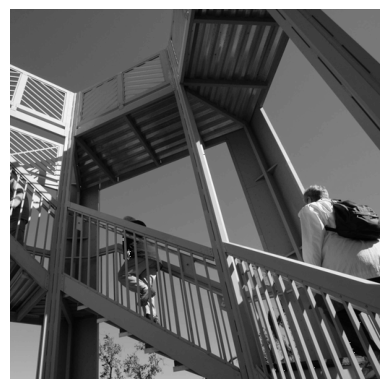

In [24]:
#Visulaize image
plt.grid(False)
plt.gray()
plt.imshow(ascent_image)
plt.axis("off")
plt.show()

In [25]:
#Copy Image
image_transformed = np.copy(ascent_image)
image_transformed

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [31]:
#Get dimensions of image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [32]:
size_x, size_y

(512, 512)

In [108]:
#creae filters as a 3*3 array 

#filters = [ [0,1,0] 
#         ,  [1,-4,1] 
#           ,[0,1,0] ]

#filters= [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

filters  =[ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]


weight=1

In [109]:
#Iteraror of image
for x in range(1,size_x-1):
    for y in range(1 , size_y-1):
        convolution=0.0
        
        convolution = convolution +(ascent_image[x-1 , y-1]   * filters[0][0] )
        convolution = convolution +(ascent_image[x-1 , y]     * filters[0][1] )
        convolution = convolution +(ascent_image[x-1 , y+1]   * filters[0][2] )
        
        convolution = convolution +(ascent_image[x , y-1]     * filters[1][0] )
        convolution = convolution +(ascent_image[x , y]       * filters[1][1] )
        convolution = convolution +(ascent_image[x , y+1]     * filters[1][2] )
        
        convolution = convolution +(ascent_image[x-1 , y-1]   * filters[2][0] )
        convolution = convolution +(ascent_image[x-1 , y]     * filters[2][1] )
        convolution = convolution +(ascent_image[x-1 , y+1]   * filters[2][2] )
        
        
        convolution=convolution*weight
        
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
       # Load into the transformed image
        image_transformed[x, y] = convolution

        

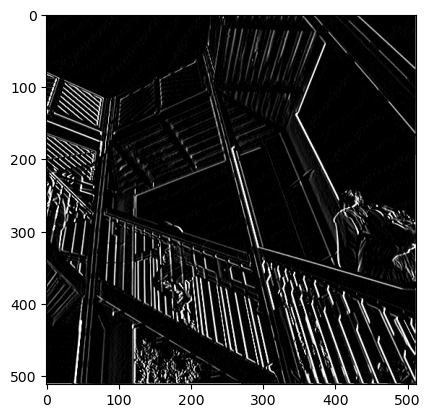

In [110]:
# Plot image
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

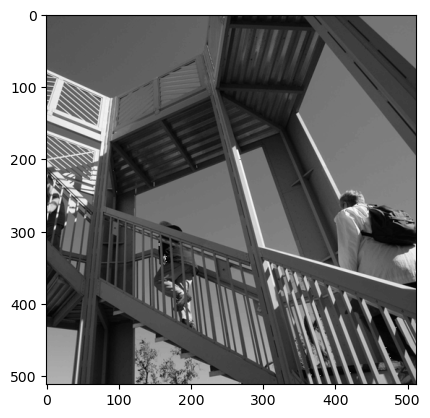

In [86]:
plt.imshow(ascent_image)

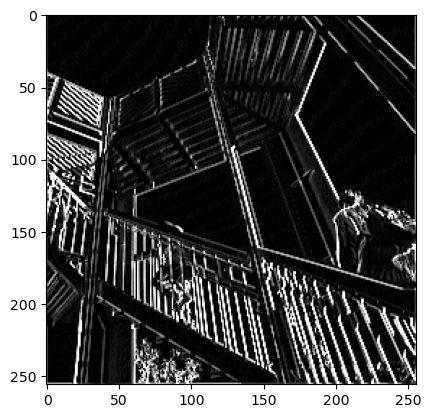

In [111]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    
    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()      